In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import os
import datetime

plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
 import seaborn as sns 
plot = sns.import(
     x="date", 
    y="seconds", 
    data=all_convo-df,
    hue='send_name',
    fit_reg=False,
    legend=True, 
    palette="Set1",
    col="sender_name",
    col_wrap=4
    )

SyntaxError: invalid syntax (<ipython-input-4-eb4b1dd13486>, line 2)

# Loading a single person's conversation

This hard codes the conversation, you can get the link by right clicking on the file you want and then chosing _Copy Relative Path_ and then pasting it in below.

In [1]:
relative_path = "fb_data/messages/inbox/megansu_zepkvzqqpg/message_2.json"
with open(relative_path) as fb_data:
    messages = json.load(fb_data)

NameError: name 'json' is not defined

In [9]:
participants = messages["participants"]
print(f"conversation between {participants[0]['name']} and {participants[1]['name']}")

conversation between Megan Su and ì¥ìì


In [10]:
message_list = messages['messages']
print(f"in this period there were {len(message_list)} messages.")

in this period there were 10000 messages.


In [11]:
unsent = [m for m in message_list if m["is_unsent"]]
print(f"{len(unsent)} messages were unsent")

7 messages were unsent


In [12]:
df = pd.DataFrame(message_list)
df["datetime"] = df.timestamp_ms.apply(lambda x: datetime.datetime.fromtimestamp(x/1000.0))
df.tail()

,sender_name,timestamp_ms,content,type,is_unsent,photos,reactions,sticker,videos,share,call_duration,missed,datetime
9995,Megan Su,1554261083074,soon,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-03 14:11:23.074
9996,ì¥ìì,1554259575840,What time u coming home?,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-03 13:46:15.840
9997,ì¥ìì,1554259556602,Hey,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-03 13:45:56.602
9998,Megan Su,1554197707217,https://www.khanacademy.org/science/ap-biology...,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-02 20:35:07.217
9999,Megan Su,1554195050194,https://www.khanacademy.org/science/biology/me...,Generic,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-02 19:50:50.194


<AxesSubplot:>

/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sooyoungjang/opt/anaconda3/lib/python3.8/site

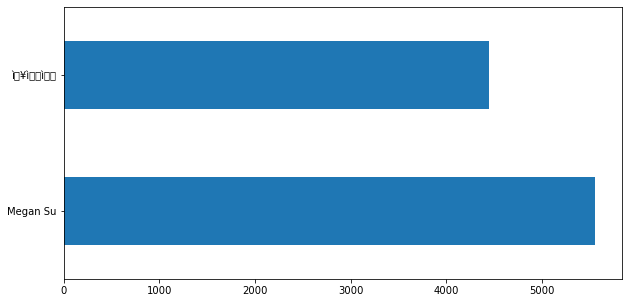

In [13]:
df.sender_name.value_counts().plot.barh()

In [14]:
words = {}
for name, data in df.groupby("sender_name"):
    words[name] = data.content.str.cat(sep=" ")
    wordcount = len(words[name].split(" "))
    print(f"{name} wrote {wordcount} words ({len(words[name])} characters)")

Megan Su wrote 24843 words (117869 characters)
ì¥ìì wrote 18767 words (86656 characters)


# Importing all the conversations

This is a bit trickier as you need to do something with all the conversations you're loading up.

In [15]:
rootdir =  "fb_data/messages/inbox"
conversations = []
for d in os.listdir(rootdir):
    conversations.append(d)
print(f"There are {len(conversations)} conversations to look at.")

There are 190 conversations to look at.


In [16]:
convo_df_list = []
for name in conversations:
    try:
        print(f"\n{name}")
        message_file =f"fb_data\messages\inbox\{name}\message_1.json" # TODO: check to see if there are more files than this, probably are over longer periods.
        with open(message_file) as fb_data:
            messages = json.load(fb_data)
        participants = messages["participants"]
        if len(participants)>1:
            print(f"conversation between {participants[0]['name']} and {participants[1]['name']}")
        message_list = messages['messages']
        print(f"in this period there were {len(message_list)} messages.")
        unsent = [m for m in message_list if m["is_unsent"]]
        print(f"{len(unsent)} messages were unsent")
        df = pd.DataFrame(message_list)
        df["source_convo"] = name
        df["datetime"] = df.timestamp_ms.apply(lambda x: datetime.datetime.fromtimestamp(x/1000.0))
        convo_df_list.append(df)

        words = {}
        for name, data in df.groupby("sender_name"):
            words[name] = data.content.str.cat(sep=" ")
            wordcount = len(words[name].split(" "))
            print(f"{name} wrote {wordcount} words ({len(words[name])} characters)")
    except Exception as e:
        print(e)


[Errno 2] No such file or directory: 'fb_data\\messages\\inbox\\jinsol_xtvz6knuqq\\message_1.json'

bagbogyeong_sfbr7_2nwa
[Errno 2] No such file or directory: 'fb_data\\messages\\inbox\\bagbogyeong_sfbr7_2nwa\\message_1.json'

8ballpoolgame_jsnpd3v-ww
[Errno 2] No such file or directory: 'fb_data\\messages\\inbox\\8ballpoolgame_jsnpd3v-ww\\message_1.json'

nalae_birkknf-ka
[Errno 2] No such file or directory: 'fb_data\\messages\\inbox\\nalae_birkknf-ka\\message_1.json'

justinlee_bi_esmfirg
[Errno 2] No such file or directory: 'fb_data\\messages\\inbox\\justinlee_bi_esmfirg\\message_1.json'

harrysuh_rwfagq4_qg
[Errno 2] No such file or directory: 'fb_data\\messages\\inbox\\harrysuh_rwfagq4_qg\\message_1.json'

gimsiu_ja2kttdwya
[Errno 2] No such file or directory: 'fb_data\\messages\\inbox\\gimsiu_ja2kttdwya\\message_1.json'

facebookuser_wivkkfm0hq
[Errno 2] No such file or directory: 'fb_data\\messages\\inbox\\facebookuser_wivkkfm0hq\\message_1.json'

gimyeong_klyjwk2hwq
[Errno 2]

In [17]:
all_convo_df = pd.concat(convo_df_list)
all_convo_df.sample(10)

ValueError: No objects to concatenate

In [18]:
all_convo_df.sender_name.value_counts().plot.barh(title="Number of messages sent", xlim=(0,2000))

NameError: name 'all_convo_df' is not defined

# Plotting time that might show sleep

This is a bit nasty, I don't really like it, but it seems to work. There _must_ be a better way.

Convert the time component of the datetime to just-date and just-time (but in seconds, as a number) and then plot that.

The y axis is nasty becasue it doesn't show 

In [ ]:
def time_to_seconds(dt):
    t = dt.time()
    seconds = (t.hour * 60 + t.minute) * 60 + t.second
    return seconds
all_convo_df["date"] = all_convo_df.datetime.apply(lambda x: x.date())
all_convo_df["seconds"] = all_convo_df.datetime.apply(time_to_seconds)
all_convo_df.sample(5)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(all_convo_df.date, all_convo_df.seconds, s=300, alpha=0.04)
ax.yaxis_date()
fig.autofmt_xdate()

plt.show()

So, this makes sense to me, but it's a bit gross. The y axis is all messed up, it should be showing time, not number of seconds. I'm also not sure if time goes forward up or down the page.

It'd be good to work out a way of identifying sleep periods. Maybe that's a period that starts after 10pm that's offline for more than 4 hours?